In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import matplotlib.animation as animation
import glob, re

import scienceplots

plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [55]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [56]:
PSO_DIR = get_last_folder("../build/results_pso/")
SA_DIR = get_last_folder("../build/results_sa/")

file_spad_figures_PSO = f"{PSO_DIR}/BEST/SPAD_figures_best_path.csv"
file_spad_figures_SA = f"{SA_DIR}/BEST/SPAD_figures_best_path.csv"

In [57]:
Iteration_PSO, BV_PSO, BrP_PSO, DW_PSO, Cost_PSO = np.loadtxt(file_spad_figures_PSO, delimiter=',', unpack=True, skiprows=1)
Iteration_SA, BV_SA, BrP_SA, DW_SA, Cost_SA = np.loadtxt(file_spad_figures_SA, delimiter=',', unpack=True, skiprows=1)

DW_SA *= 1.0e6
DW_PSO *= 1.0e6

# Sort by iteration
idx_PSO = np.argsort(Iteration_PSO)
idx_SA = np.argsort(Iteration_SA)

Iteration_PSO = Iteration_PSO[idx_PSO]
BV_PSO = BV_PSO[idx_PSO]
BrP_PSO = BrP_PSO[idx_PSO]
DW_PSO = DW_PSO[idx_PSO]
Cost_PSO = Cost_PSO[idx_PSO]

Iteration_SA = Iteration_SA[idx_SA]
BV_SA = BV_SA[idx_SA]
BrP_SA = BrP_SA[idx_SA]
DW_SA = DW_SA[idx_SA]
Cost_SA = Cost_SA[idx_SA]


In [58]:
Iteration_PSO

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

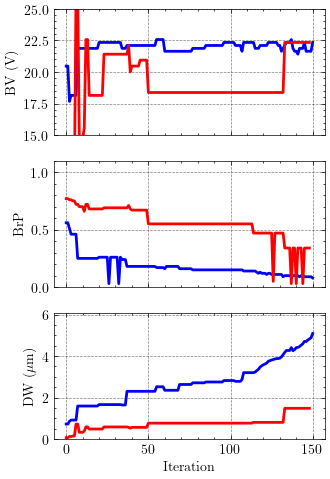

In [59]:
fig, ax = plt.subplots(3, 1, figsize=(3.5, 5), sharex=True)

ax[0].set_ylabel('BV (V)')
ax[1].set_ylabel('BrP')
ax[2].set_ylabel('DW ($\mu$m)')
ax[2].set_xlabel('Iteration')

ax[0].plot(Iteration_PSO, BV_PSO, color='b', ls='-', lw=2)
ax[1].plot(Iteration_PSO, BrP_PSO, color='b', ls="-", lw=2)
ax[2].plot(Iteration_PSO, DW_PSO, color='b', ls="-", lw=2)
ax[0].plot(Iteration_SA, BV_SA, color='r', ls="-", lw=2)
ax[1].plot(Iteration_SA, BrP_SA, color='r', ls="-", lw=2)
ax[2].plot(Iteration_SA, DW_SA, color='r', ls="-", lw=2)

ax[0].set_ylim(15, 25)
ax[1].set_ylim(0, 1.1)
ax[2].set_ylim(0, 6.1)



fig.tight_layout()

fig.savefig('/home/remi/Papers/IWCN23/figuresiter.pdf', dpi=300)

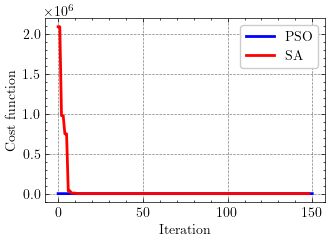

In [60]:
# Plot cost function
fig, ax = plt.subplots(1, 1)

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost function')

ax.plot(Iteration_PSO, Cost_PSO, color='b', ls="-", label="PSO", lw=2)
ax.plot(Iteration_SA, Cost_SA, color='r', ls="-", label="SA", lw=2)
# ax.set_ylim(-150, 10)
ax.legend()

fig.tight_layout()
fig.savefig('/home/remi/Papers/IWCN23/figuresiter_cost.pdf', dpi=300)
